In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

movie_df = pd.read_csv('/Users/Kainan/Documents/IMDB-Movie-Data.csv')
movie_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [42]:
#数据清洗
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [43]:
movie_df.shape

(1000, 12)

In [44]:
movie_df.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [45]:
#Revenue票房 和 Metascores影评人评分 都有缺失值
movie_df['Revenue (Millions)']=movie_df['Revenue (Millions)'].fillna(movie_df['Revenue (Millions)'].mean() )
movie_df['Metascore'] = movie_df['Metascore'].fillna(movie_df['Metascore'].mean())

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    1000 non-null float64
Metascore             1000 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [46]:
movie = pd.DataFrame()
movie['Mtscore'] = movie_df['Metascore'] / 10
movie.head()

,Mtscore
0,7.6
1,6.5
2,6.2
3,5.9
4,4.0


In [47]:
movie_df = pd.concat([movie_df, movie], axis = 1)
movie_df.drop(['Metascore', 'Description'], axis=1, inplace=True)

movie_df.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Mtscore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,7.6
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,6.5
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,6.2
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,5.9
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,4.0


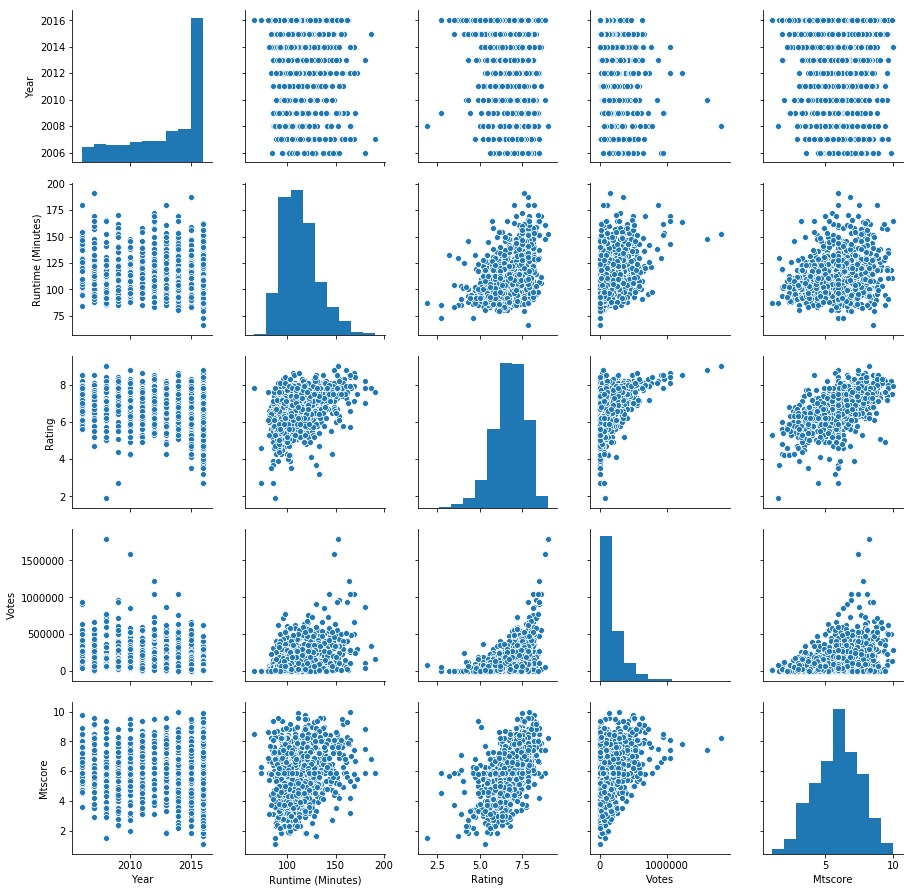

In [48]:
sns.pairplot(movie_df[['Year','Runtime (Minutes)','Rating','Votes', 'Mtscore']])

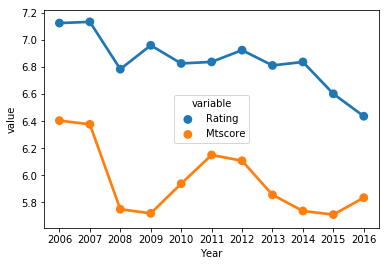

In [49]:
fig = plt.figure()
ax= fig.add_subplot()

compare = pd.melt(movie_df[['Year','Rating','Mtscore']], id_vars=['Year'], value_vars=['Rating', 'Mtscore'])
compareAggregated = pd.DataFrame(compare.groupby(["Year",'variable'],sort=True)['value'].mean()).reset_index()
sns.pointplot(x=compareAggregated['Year'], y=compareAggregated['value'],hue=compareAggregated['variable'],hue_order=['Rating','Mtscore'], data=compareAggregated, join=True, ax=ax)

In [74]:
dir_counts = movie_df['Director'].value_counts()
dir_counts.name = 'D_counts'
dir_counts10 = dir_counts.head(10)
dir_counts10

Ridley Scott          8
Paul W.S. Anderson    6
Michael Bay           6
David Yates           6
M. Night Shyamalan    6
J.J. Abrams           5
Danny Boyle           5
Justin Lin            5
Antoine Fuqua         5
Woody Allen           5
Name: D_counts, dtype: int64

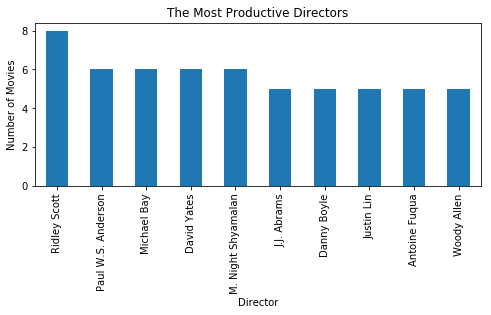

In [78]:
fig,ax = plt.subplots(figsize=(8,3))
dir_counts10.plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('The Most Productive Directors')
plt.show()
fig.savefig('prod_dir.jpg')